In [1]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, scipy.stats as stats, pandas as pd, os, glob
import ast
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [23]:
subj = 'salma'

df = pd.read_csv(glob.glob(f'../results/*{subj}*csv')[0])[:-3]
print(df['correct'].value_counts(normalize=True))

# 1.
for col in ['positions']:
    if type(df[col][0]) == str:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x)) # convert str to list

# 3. # get dist between targer & last position
df['precision'] = abs(df['target_pos'] - df['positions'].apply(lambda x: x[-1]))

# 4.
df['dist'] = df['positions'].apply(lambda x: abs(x[-1] - x[0]))
df['avg_speed'] = df['dist'] / df['trials.submit_resp.rt']

# 5.
df['choice'] = df['outcome'].apply(lambda x: 1 if abs(x) == 2 else 0 if abs(x) == 1 else 0)
# df = df[df['choice'] != 0]

# 6.
# filtering out easy trials
df_hard = df[df['target_pos'] - df['disp_div'] <= .05].copy()
print(f'% trials with |target-divider| <= .1: {len(df_hard)/len(df)}')

correct
 1.0    0.858333
-1.0    0.091667
 0.0    0.050000
Name: proportion, dtype: float64
% trials with |target-divider| <= .1: 0.5666666666666667


compression
penalty compressed    46
reward compressed     46
baseline              44
Name: count, dtype: int64
correct
1.0    113
0.0     23
Name: count, dtype: int64
          compression valence  precision
0            baseline     pen   0.129318
1            baseline     rew   0.106227
2  penalty compressed     pen   0.183500
3  penalty compressed     rew   0.069708
4   reward compressed     pen   0.065750
5   reward compressed     rew   0.155455


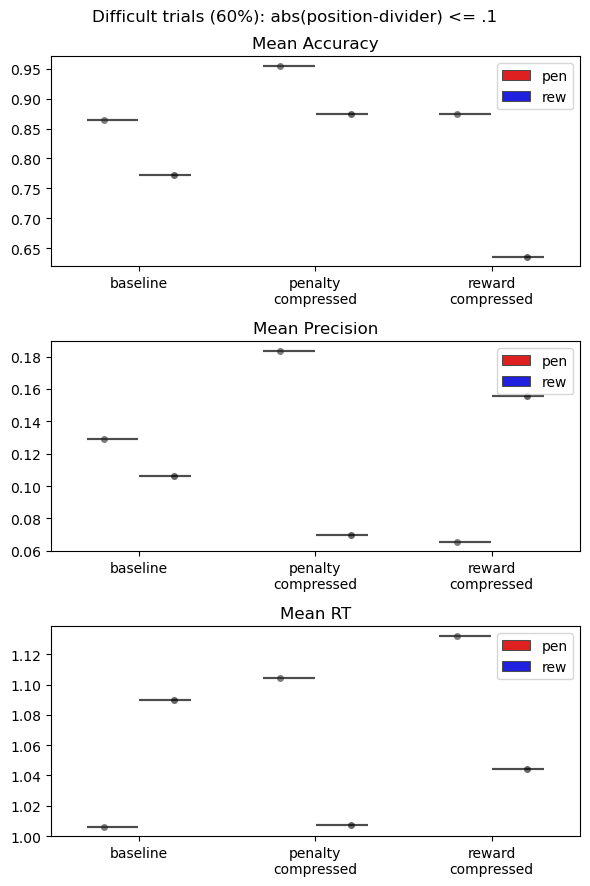

In [24]:
df_hard['compression'] = df_hard['div'].apply(lambda x: 'baseline' if x == 0 else 'penalty compressed' if x == -.2 else 'reward compressed')
df_hard['correct'] = df_hard['correct'].apply(lambda x: 0 if x == -1 else x)
print(df_hard['compression'].value_counts())
print(df_hard['correct'].value_counts())

fig, axes = plt.subplots(3, 1, figsize=(6, 9))
# suptitle
fig.suptitle('Difficult trials (60%): abs(position-divider) <= .1')

# 1.
ax = axes[0]
group_df = df_hard.groupby(['compression', 'valence'])['correct'].mean().reset_index()
sns.boxplot(data=group_df, x='compression', y='correct', hue='valence',
            showcaps=False, fliersize=0, width=0.6, palette=['red', 'blue'], ax=ax)
sns.stripplot(data=group_df, x='compression', y='correct', hue='valence', 
              dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Mean Accuracy')
ax.legend()
ax.set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])

# 2.
ax = axes[1]
group_df = df_hard.groupby(['compression', 'valence'])['precision'].mean().reset_index()
print(group_df)
sns.boxplot(data=group_df, x='compression', y='precision', hue='valence',
            showcaps=False, fliersize=0, width=0.6, palette=['red', 'blue'], ax=ax)
sns.stripplot(data=group_df, x='compression', y='precision', hue='valence', 
              dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Mean Precision')
ax.legend()
ax.set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])

# 3.
ax = axes[2]
group_df = df_hard.groupby(['compression', 'valence'])['trials.submit_resp.rt'].mean().reset_index()
sns.boxplot(data=group_df, x='compression', y='trials.submit_resp.rt', hue='valence',
            showcaps=False, fliersize=0, width=0.6, palette=['red', 'blue'], ax=ax)
sns.stripplot(data=group_df, x='compression', y='trials.submit_resp.rt', hue='valence', 
              dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Mean RT')
ax.legend()
ax.set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])


plt.tight_layout()
plt.show()